In [9]:
# PROJETO: SEGMENTAÇÃO DE PERFIS DE CLIENTES DE CRÉDITO
# ETAPA 1: CARREGAMENTO E LIMPEZA DOS DADOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento e limpeza inicial dos dados 
try:
    file_path = '../data/german_credit_data.csv' 
    df = pd.read_csv(file_path)
    
    # Remover a coluna 'Unnamed: 0'
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
        print("Coluna 'Unnamed: 0' removida.")

    # Renomear as 9 colunas restantes para o padrão Python
    df.columns = [
        'age', 'sex', 'job', 'housing', 'saving_accounts', 
        'checking_account', 'credit_amount', 'duration', 'purpose'
    ]
    
except FileNotFoundError:
    print(f"\n--- ERRO ---")
    print(f"Arquivo não encontrado em '{file_path}'")
    print("Verifique se o arquivo 'german_credit_data.csv' está na pasta 'data'.")

df.head()


Coluna 'Unnamed: 0' removida.


,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [10]:
# ETAPA 2: PRÉ-PROCESSAMENTO E MAPEAMENTO DE VARIÁVEIS

# Dicionário para mapear os códigos da coluna 'job' para seus significados
job_map = {
    0: 'Desempregado/Não Qualificado',
    1: 'Não Qualificado (Residente)',
    2: 'Qualificado/Servidor Público',
    3: 'Gerente/Autônomo/Alta Qualificação'
}

# Criar uma nova coluna 'job_description' usando o mapa
df['job_description'] = df['job'].map(job_map)
df[['job', 'job_description']].head()

,job,job_description
0,2,Qualificado/Servidor Público
1,2,Qualificado/Servidor Público
2,1,Não Qualificado (Residente)
3,2,Qualificado/Servidor Público
4,2,Qualificado/Servidor Público


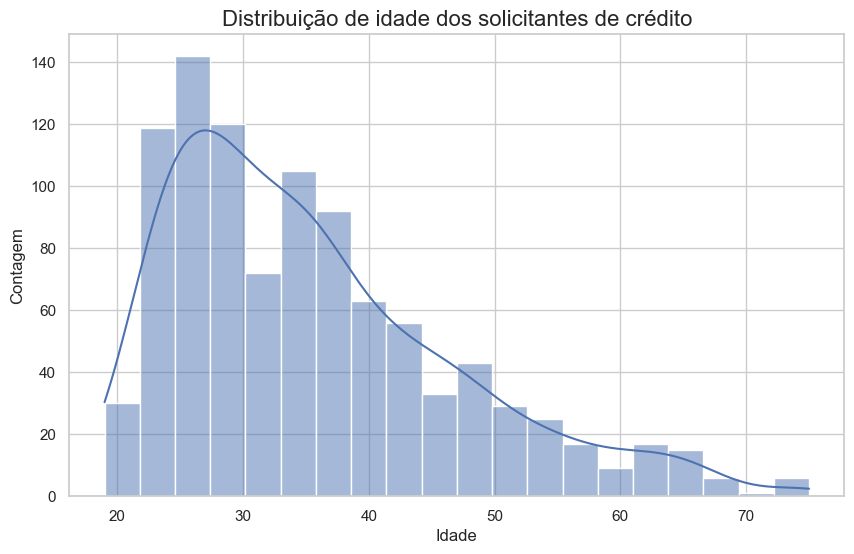

In [ ]:
# ETAPA 3: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
# 3.1 - Distribuição de idade dos solicitantes de crédito

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribuição de idade dos solicitantes de crédito', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()


C:\Users\E385549\AppData\Local\Temp\ipykernel_25292\263047724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index, palette='viridis')


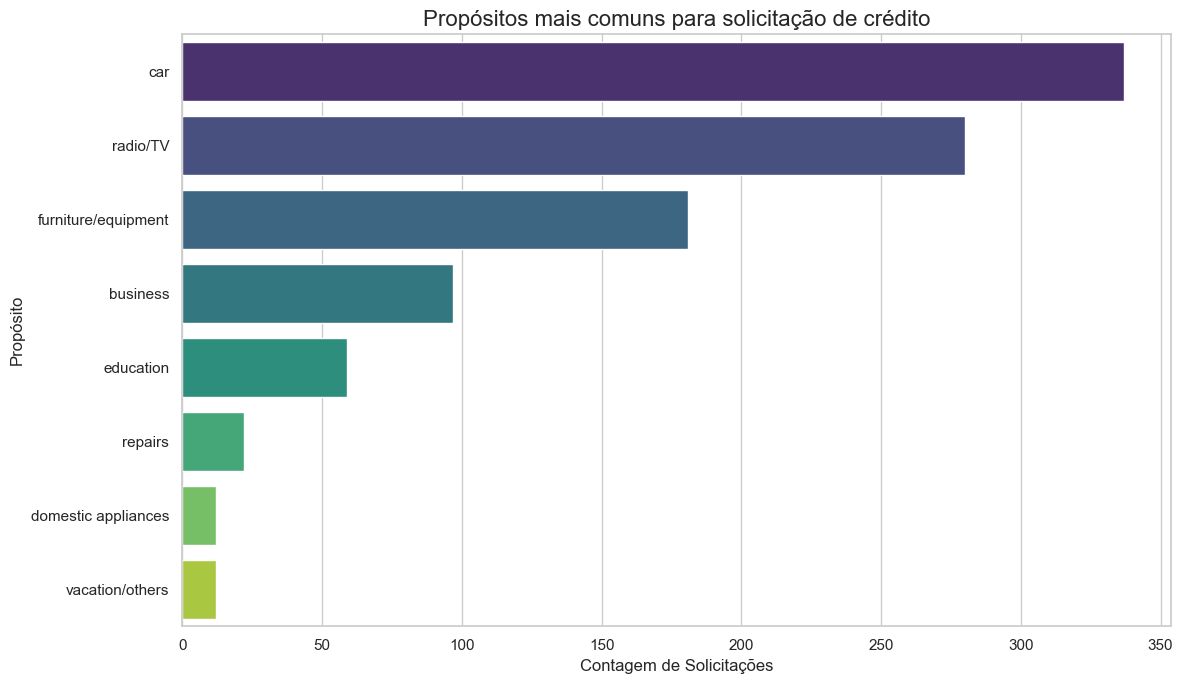

In [6]:
# 3.2 - Propósitos Mais Comuns para Solicitação de Crédito

plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index, palette='viridis')
plt.title('Propósitos mais comuns para solicitação de crédito', fontsize=16)
plt.xlabel('Contagem de Solicitações', fontsize=12)
plt.ylabel('Propósito', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\E385549\AppData\Local\Temp\ipykernel_25292\1330054652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='credit_amount', y='job_description', palette='magma')


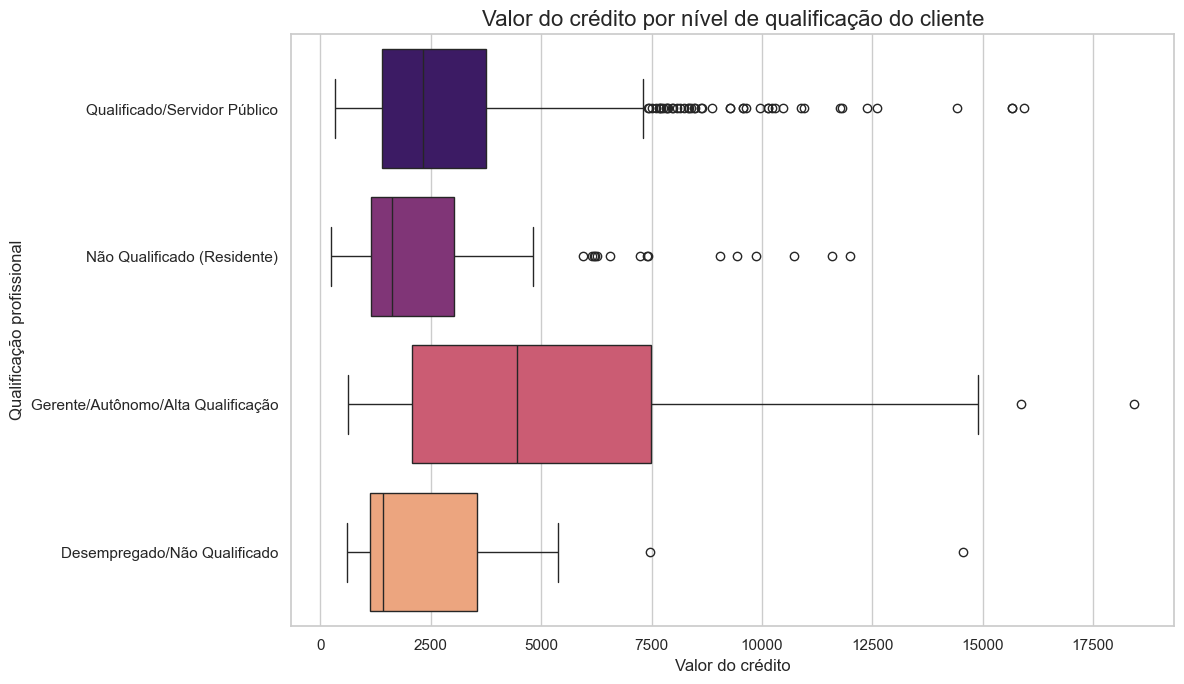

In [7]:
# 3.3 - Relação entre valor do crédito e qualificação profissional

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='credit_amount', y='job_description', palette='magma')
plt.title('Valor do crédito por nível de qualificação do cliente', fontsize=16)
plt.xlabel('Valor do crédito', fontsize=12)
plt.ylabel('Qualificação profissional', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# ETAPA 4: PRÉ-PROCESSAMENTO PARA CLUSTERIZAÇÃO
# 4.1 - Tratamento de Valores Faltantes (NaN)

# Verificar valores faltantes
print("Contagem de valores faltantes antes do tratamento:")
print(df.isnull().sum())

# Preencher valores faltantes em 'saving_accounts' e 'checking_account' com 'unknown'
df['saving_accounts'] = df['saving_accounts'].fillna('unknown')
df['checking_account'] = df['checking_account'].fillna('unknown')
print("\nContagem de valores faltantes após o tratamento:")
print(df.isnull().sum())

Contagem de valores faltantes antes do tratamento:
age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
job_description       0
dtype: int64

Contagem de valores faltantes após o tratamento:
age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
job_description     0
dtype: int64


In [12]:
# 4.2 - Transformação de Variáveis Categóricas (One-Hot Encoding)

categorical_cols = [
    'sex', 'housing', 'saving_accounts', 'checking_account', 
    'purpose', 'job_description'
]

# Usar a função get_dummies do pandas para One-Hot Encoding
df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = False)
print("Formato do DataFrame após o One-Hot Encoding:", df_encoded.shape)

df_encoded.head()

Formato do DataFrame após o One-Hot Encoding: (1000, 28)


,age,job,credit_amount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,saving_accounts_little,...,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,job_description_Desempregado/Não Qualificado,job_description_Gerente/Autônomo/Alta Qualificação,job_description_Não Qualificado (Residente),job_description_Qualificado/Servidor Público
0,67,2,1169,6,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,22,2,5951,48,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,49,1,2096,12,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
3,45,2,7882,42,False,True,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
4,53,2,4870,24,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [16]:
# 4.3 - Padronização de Escalas (Feature Scaling)

from sklearn.preprocessing import StandardScaler

# O standardScaler só funciona em dados numéricos. Vamos precisar remover a coluna 'job' original antes de aplicar a padronização.
if 'job' in df_encoded.columns:
    df_to_scale = df_encoded.drop('job', axis=1)
else:
    df_to_scale = df_encoded

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Treinar o scaler e transformar os dados
scaled_features = scaler.fit_transform(df_to_scale)
# Transformar de volta para DataFrame para melhor visualização
df_scaled = pd.DataFrame(scaled_features, columns=df_to_scale.columns)
df_scaled.head()

,age,credit_amount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,saving_accounts_little,saving_accounts_moderate,...,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,job_description_Desempregado/Não Qualificado,job_description_Gerente/Autônomo/Alta Qualificação,job_description_Não Qualificado (Residente),job_description_Qualificado/Servidor Público
0,2.766456,-0.745131,-1.236478,-0.670280,0.670280,-0.347960,0.634448,-0.466933,-1.232433,-0.338862,...,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,-0.149983,-0.416784,-0.5,0.766356
1,-1.191404,0.949817,2.248194,1.491914,-1.491914,-0.347960,0.634448,-0.466933,0.811403,-0.338862,...,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,-0.149983,-0.416784,-0.5,0.766356
2,1.183312,-0.416562,-0.738668,-0.670280,0.670280,-0.347960,0.634448,-0.466933,0.811403,-0.338862,...,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208,-0.149983,-0.416784,2.0,-1.304877
3,0.831502,1.634247,1.750384,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.811403,-0.338862,...,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208,-0.149983,-0.416784,-0.5,0.766356
4,1.535122,0.566664,0.256953,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.811403,-0.338862,...,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208,-0.149983,-0.416784,-0.5,0.766356


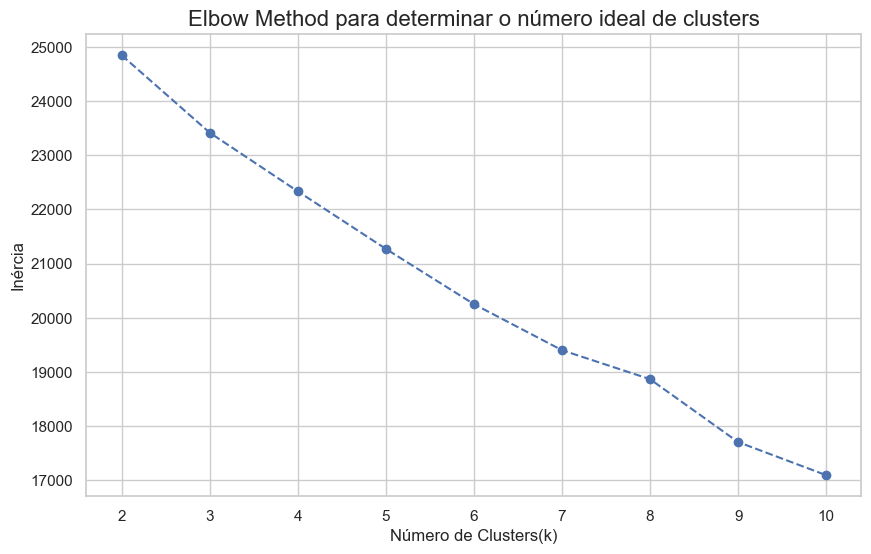

In [17]:
# ETAPA 5: MODELAGEM - ENCONTRANDO O NÚMERO IDEAL DE CLUSTERS
# 5.1 - Elbow Method

from sklearn.cluster import KMeans

# Lista para armazenar os valores de inertia
inertia = []
# Range de clusters para testar
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method para determinar o número ideal de clusters", fontsize=16)
plt.xlabel("Número de Clusters(k)", fontsize=12)
plt.ylabel("Inércia", fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [18]:
# ETAPA 6: TREINAMENTO DO MODELO FINAL E ANÁLISE DOS CLUSTERS

# Número ideal de clusters determinado pelo Elbow Method
optimal_k = 4
# Treinar o modelo KMeans final com o número ideal de clusters
kmeans_final =KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(df_scaled)

# Adicionar os rótulos dos clusters ao DataFrame original
df['cluster'] = kmeans_final.labels_
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,job_description,cluster
0,67,male,2,own,NaN,little,1169,6,radio/TV,Qualificado/Servidor Público,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,Qualificado/Servidor Público,3
2,49,male,1,own,little,NaN,2096,12,education,Não Qualificado (Residente),0
3,45,male,2,free,little,little,7882,42,furniture/equipment,Qualificado/Servidor Público,1
4,53,male,2,free,little,little,4870,24,car,Qualificado/Servidor Público,1
